# Assignment - Exercise 7.2 Titanic Case Study Part3
## Week#7
## Date - July-22-2021
## Author - Ganesh Kale

#### _import required packages_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

#### _load the data into dataframe_

In [2]:
titanic = pd.read_csv("data/titanic.csv")

#### _display shape and top 5 records_

In [3]:
titanic.shape
titanic.head()

(891, 12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### _display variables type and counts_

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### _descriptive stats summary of numerical variables_

In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### _summary of variables with object data type_

In [6]:
titanic.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",male,347082,B96 B98,S
freq,1,577,7,4,644


## Data Visualization

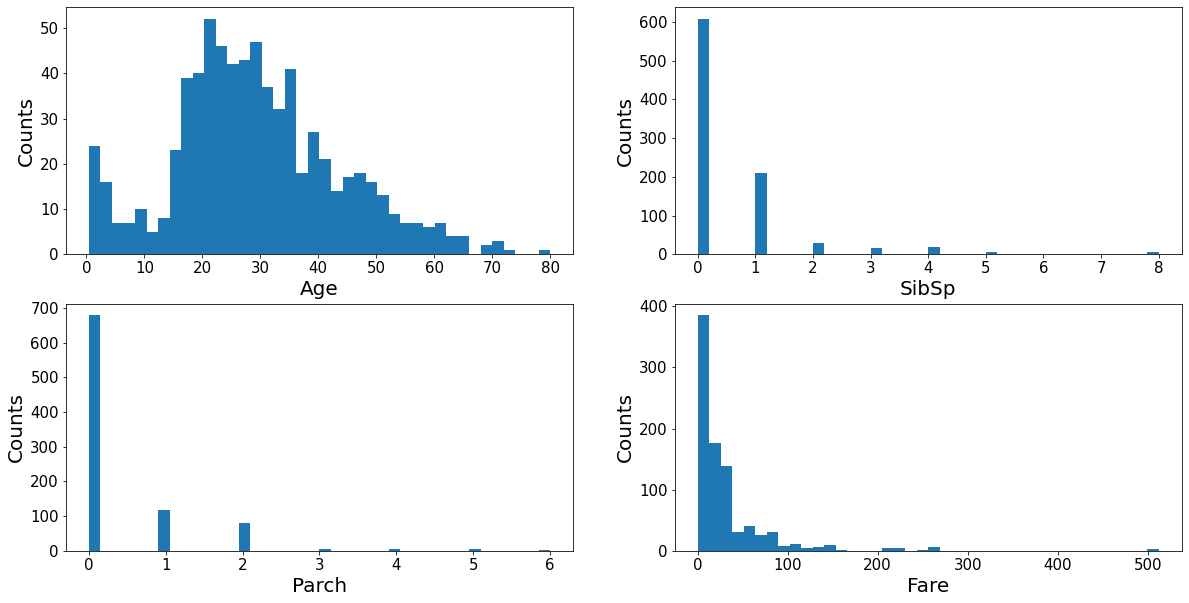

In [7]:
# set up the figure size

plt.rcParams['figure.figsize'] = (20, 10)

# Specify the features of interest

num_features = ['Age', 'SibSp', 'Parch', 'Fare']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# make subplots

fig, axes = plt.subplots(nrows = 2, ncols = 2)

# draw histograms

axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(titanic[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show();

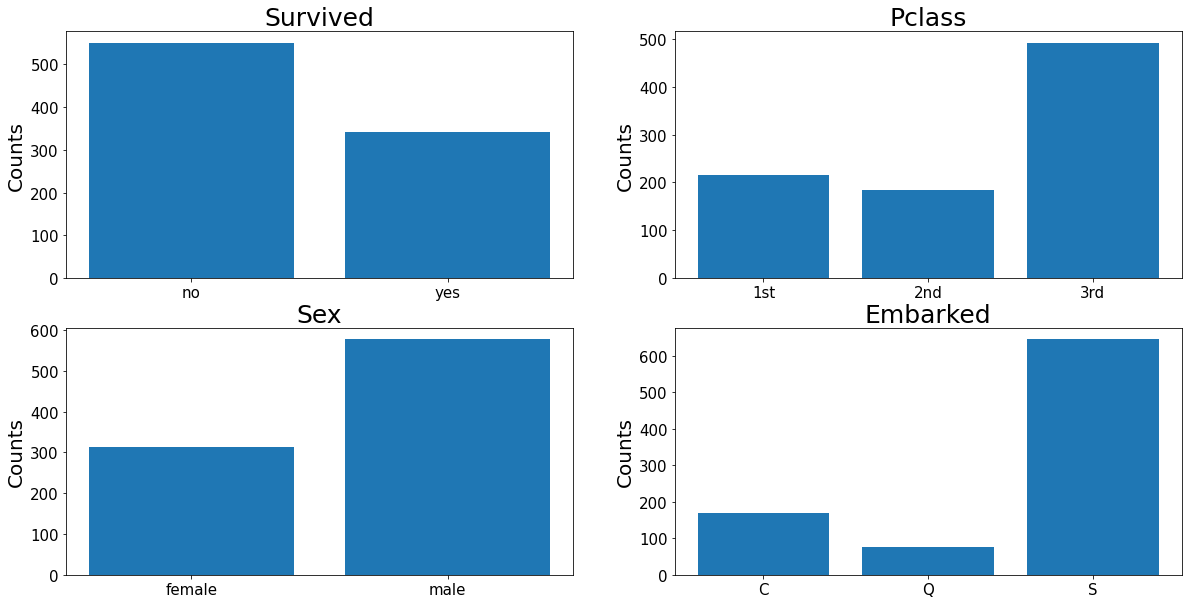

In [8]:
# Barcharts: set up the figure size

plt.rcParams['figure.figsize'] = (20, 10)

# make the survived data read to feed into the visulizer
X_Survived = titanic.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Survived']
Y_Survived = titanic.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Counts']

# make the Pclass data read to feed into the visulizer
X_Pclass = titanic.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Pclass']
Y_Pclass = titanic.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Counts']

# make the Sex data read to feed into the visulizer
X_Sex = titanic.groupby('Sex').size().reset_index(name='Counts')['Sex']
Y_Sex = titanic.groupby('Sex').size().reset_index(name='Counts')['Counts']

# make the Embarked data read to feed into the visulizer
X_Embarked = titanic.groupby('Embarked').size().reset_index(name='Counts')['Embarked']
Y_Embarked = titanic.groupby('Embarked').size().reset_index(name='Counts')['Counts']

# make subplots

fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the bar plot for - Survived variable
axes[0, 0].bar(X_Survived, Y_Survived)
axes[0, 0].set_title('Survived', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)


# make the bar plot for - PClass variable
axes[0, 1].bar(X_Pclass, Y_Pclass)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)


# make the bar plot for - Sex Variable
axes[1, 0].bar(X_Sex, Y_Sex)
axes[1, 0].set_title('Sex', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)


# make the bar plot for - Embarked variable
axes[1, 1].bar(X_Embarked, Y_Embarked)
axes[1, 1].set_title('Embarked', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
plt.show();

#### _Pearson Ranking_

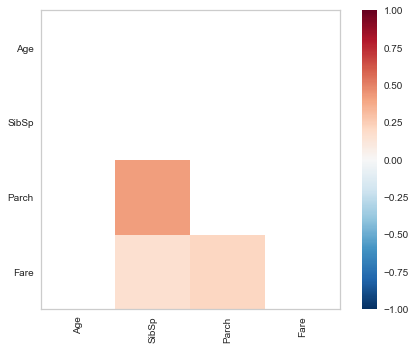

In [9]:
# set up figure size

plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation

from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame

X = titanic[num_features].values

# instantiate the visualizer with the Covariance ranking algorithm

visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
# visualizer.poof(outpath="data/pcoords1.png") # Draw/show/poof the data
plt.show();

#### _Compare variables against Survived and Not Survived_

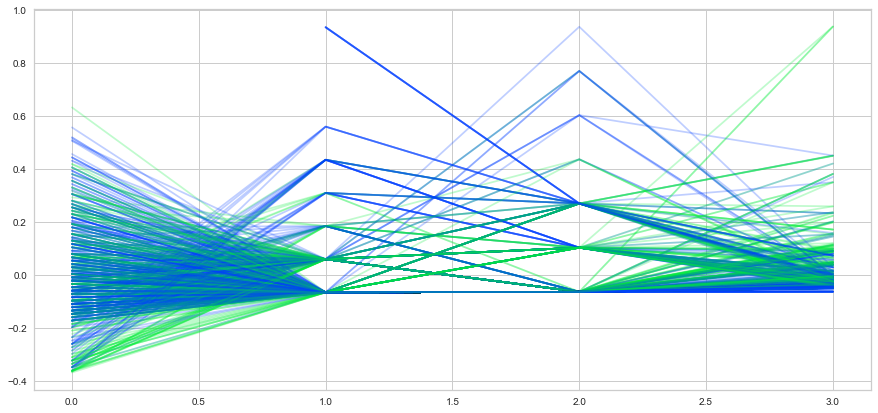

In [10]:
#set up the figure size

plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer

from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages

from yellowbrick.features import ParallelCoordinates

# Specify the features of interest and the classes of the target

classes = ['Not-survived', 'Survived']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']

# copy data to a new dataframe

data_norm = titanic.copy()

# normalize data to 0-1 range

for feature in num_features:
    data_norm[feature] = (titanic[feature] - titanic[feature].mean(skipna=True)) / (titanic[feature].max(skipna=True) - titanic[feature].min(skipna=True))


# Extract the numpy arrays from the data frame

X = data_norm[num_features].values
y = titanic.Survived.values

# Instantiate the visualizer

visualizer = ParallelCoordinates(classes=classes, features=num_features)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
#visualizer.poof(outpath="d://pcoords2.png") # Draw/show/poof the data
plt.show();

#### _stacked bar charts to compare survived/not survived_

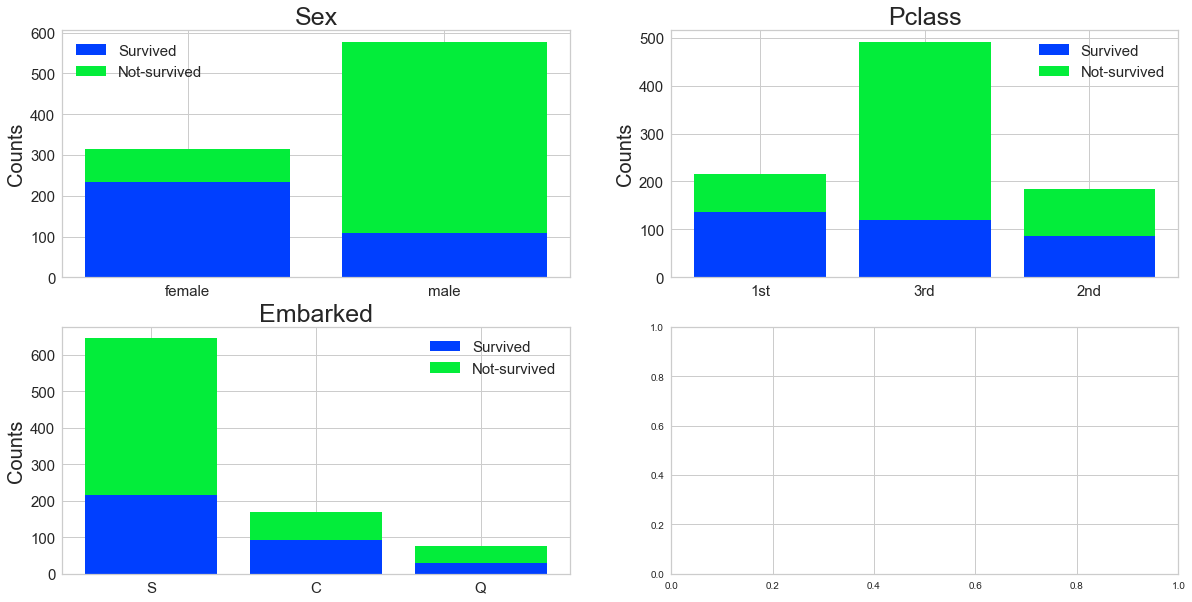

In [11]:
#set up the figure size

plt.rcParams['figure.figsize'] = (20, 10)

# make the data read to feed into the visulizer - sex variable - Survived vs not-survived

Sex_survived = titanic.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[titanic['Survived']==1]['Sex'].value_counts()
Sex_not_survived = titanic.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[titanic['Survived']==0]['Sex'].value_counts()
Sex_not_survived = Sex_not_survived.reindex(index = Sex_survived.index)


# make the data read to feed into the visualizer -  Pclass Variable
Pclass_survived = titanic.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[titanic['Survived']==1]['Pclass'].value_counts()
Pclass_not_survived = titanic.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[titanic['Survived']==0]['Pclass'].value_counts()
Pclass_not_survived = Pclass_not_survived.reindex(index = Pclass_survived.index)


# make the data read to feed into the visualizer - Embarked variable
Embarked_survived = titanic.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[titanic['Survived']==1]['Embarked'].value_counts()
Embarked_not_survived = titanic.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[titanic['Survived']==0]['Embarked'].value_counts()
Embarked_not_survived = Embarked_not_survived.reindex(index = Embarked_survived.index)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)


# make the bar plot - Sex variable
p1 = axes[0, 0].bar(Sex_survived.index, Sex_survived.values)
p2 = axes[0, 0].bar(Sex_not_survived.index, Sex_not_survived.values, bottom=Sex_survived.values)
axes[0, 0].set_title('Sex', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Survived', 'Not-survived'), fontsize = 15)


# make the bar plot - PClass variable
p3 = axes[0, 1].bar(Pclass_survived.index, Pclass_survived.values)
p4 = axes[0, 1].bar(Pclass_not_survived.index, Pclass_not_survived.values, bottom=Pclass_survived.values)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Survived', 'Not-survived'), fontsize = 15)


# make the bar plot - EMbarked variable
p5 = axes[1, 0].bar(Embarked_survived.index, Embarked_survived.values)
p6 = axes[1, 0].bar(Embarked_not_survived.index, Embarked_not_survived.values, bottom=Embarked_survived.values)
axes[1, 0].set_title('Embarked', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Survived', 'Not-survived'), fontsize = 15)
plt.show();

#### _fill in missing values and eliminate features_

#### _display columns with missing values_

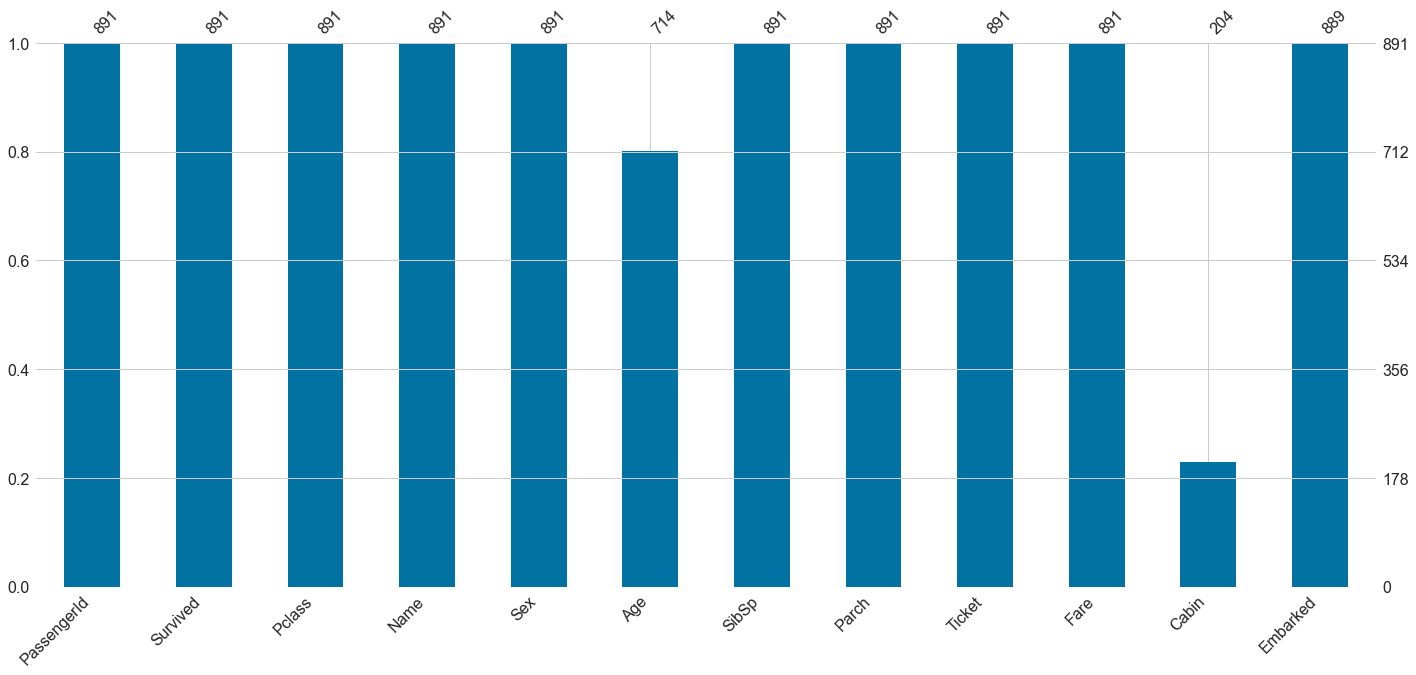

In [12]:
# display bar plot for each varible to show missing values 

msno.bar(titanic,color='b');

In [13]:
#fill the missing age data with median value

def fill_na_median(data, inplace=True):
    return data.fillna(data.median(), inplace=inplace)


fill_na_median(titanic['Age'])

In [14]:
# display filled data to Age column

titanic['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [15]:
# fill na with the most represented value

def fill_na_most(data, inplace=True):
    return data.fillna('S', inplace=inplace)

fill_na_most(titanic['Embarked'])

In [16]:
# display filled data to Embarked column

titanic['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [17]:
# log-transformation

def log_transformation(data):
    return data.apply(np.log1p)

titanic['Fare_log1p'] = log_transformation(titanic['Fare'])

In [18]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_log1p
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,2.962246
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.969048
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,2.187218
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,2.737881
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,3.465736
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,6.240917


#### _adjust skewed data_

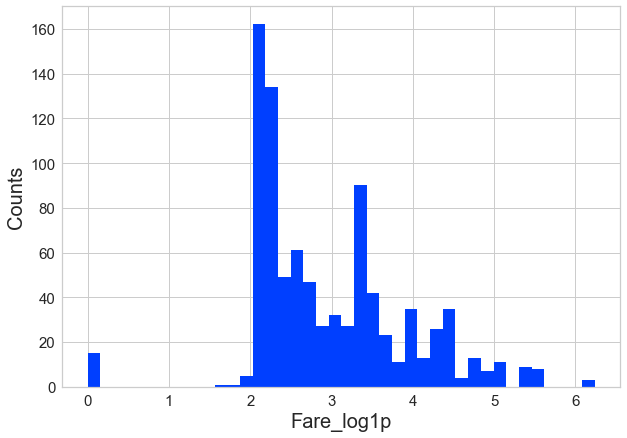

In [19]:
#check the distribution using histogram
# set up the figure size

plt.rcParams['figure.figsize'] = (10, 7)

plt.hist(titanic['Fare_log1p'], bins=40)
plt.xlabel('Fare_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show();

#### _convert categorical data to numbers_

In [20]:
#get the categorical data

cat_features = ['Pclass', 'Sex', "Embarked"]
data_cat = titanic[cat_features]
data_cat = data_cat.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})

# One Hot Encoding 

data_cat_dummies = pd.get_dummies(data_cat)

# check the data
data_cat_dummies = data_cat_dummies.astype('int64')
data_cat_dummies.head()

,Pclass_1st,Pclass_2nd,Pclass_3rd,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1


# Continuation from part-2

## Titanic Case Study PART-3

## Model Selection and Evaluation

In [21]:
# combine the numerical features and the dummie features together

features_model = ['Age', 'SibSp', 'Parch', 'Fare_log1p']

data_model_X = pd.concat([titanic[features_model], data_cat_dummies], axis=1)

In [22]:
# display head of combined dataframe

data_model_X.head()

,Age,SibSp,Parch,Fare_log1p,Pclass_1st,Pclass_2nd,Pclass_3rd,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,2.110213,0,0,1,0,1,0,0,1
1,38.0,1,0,4.280593,1,0,0,1,0,1,0,0
2,26.0,0,0,2.188856,0,0,1,1,0,0,0,1
3,35.0,1,0,3.990834,1,0,0,1,0,0,0,1
4,35.0,0,0,2.202765,0,0,1,0,1,0,0,1


In [23]:
type(data_model_X['Embarked_S'][0])

numpy.int64

In [24]:
# create a whole target dataset that can be used for train and validation data splitting

# data_model_y = titanic.replace({'Survived': {1: 'Survived', 0: 'Not_survived'}})['Survived']
data_model_y = titanic.Survived

In [25]:
# display head of target variable

data_model_y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Split data into Train and Validation(test) datasets

In [26]:
# import required package

from sklearn.model_selection import train_test_split

In [27]:
# split the data

X_train, X_test, y_train, y_test = train_test_split(data_model_X, data_model_y, test_size=0.3, random_state=11)

In [28]:
# number of samples in each set

f"Shape of Training Dataset: {X_train.shape}"
f"Shape of Validation Dataset: {X_test.shape}"

'Shape of Training Dataset: (623, 12)'

'Shape of Validation Dataset: (268, 12)'

In [29]:
# Survived and not-survived - target variable

f"No. of survived and not-survived in the training set:"
y_train.value_counts()

'No. of survived and not-survived in the training set:'

0    373
1    250
Name: Survived, dtype: int64

In [30]:
f"No. of survived and not-survived in the validation set:"
y_test.value_counts()

'No. of survived and not-survived in the validation set:'

0    176
1     92
Name: Survived, dtype: int64

In [31]:
y_test.head()

431    1
821    1
629    0
626    0
665    0
Name: Survived, dtype: int64

## Model Training and Evaluation:

In [32]:
# import packages needed for training model and evaluating it

# from sklearn.linear_model import LogisticRegression
import sklearn.linear_model as lm
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC


In [33]:
# Instantiate the classification model 

model = lm.LogisticRegression()

dict_keys(['ax', 'classes', 'cmap', 'encoder', 'estimator', 'fontsize', 'force_model', 'is_fitted', 'percent', 'sample_weight']) 


dict_keys(['ax', 'classes', 'cmap', 'encoder', 'estimator', 'fontsize', 'force_model', 'is_fitted', 'percent', 'sample_weight']) 




ConfusionMatrix(ax=<AxesSubplot:>, classes=['Not_survived', 'Survived'],
                cmap=<matplotlib.colors.ListedColormap object at 0x14404f820>,
                estimator=LogisticRegression())

0.8470149253731343

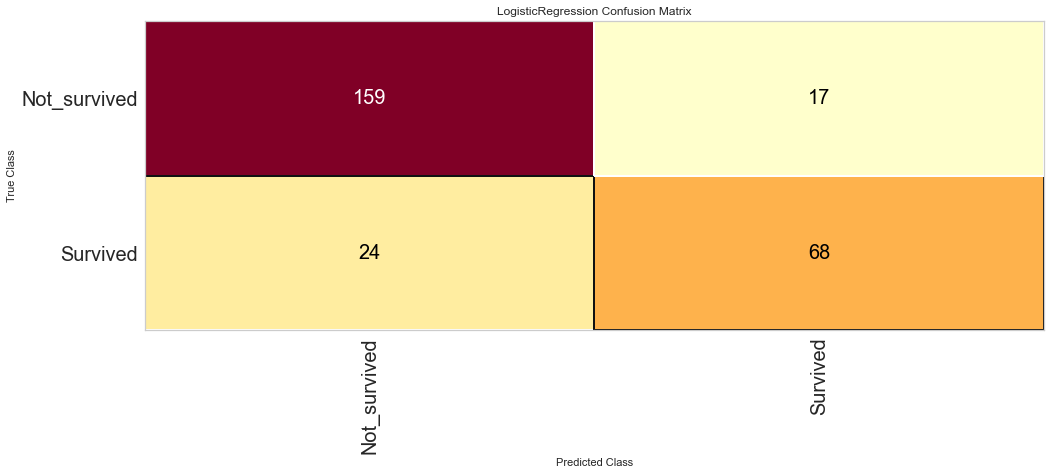

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [45]:
#The ConfusionMatrix visualizer taxes a model

classes = ['Not_survived','Survived']
cm = ConfusionMatrix(model, percent=False, classes=classes)

# train the model

cm.fit(X_train, y_train);

# Create the ConfusionMatrix, 

cm.score(X_test, y_test)

# change fontsize of the labels in the figure

for label in cm.ax.texts:
    label.set_size(20)

#How did we do?|

cm.poof()

In [35]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 

plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

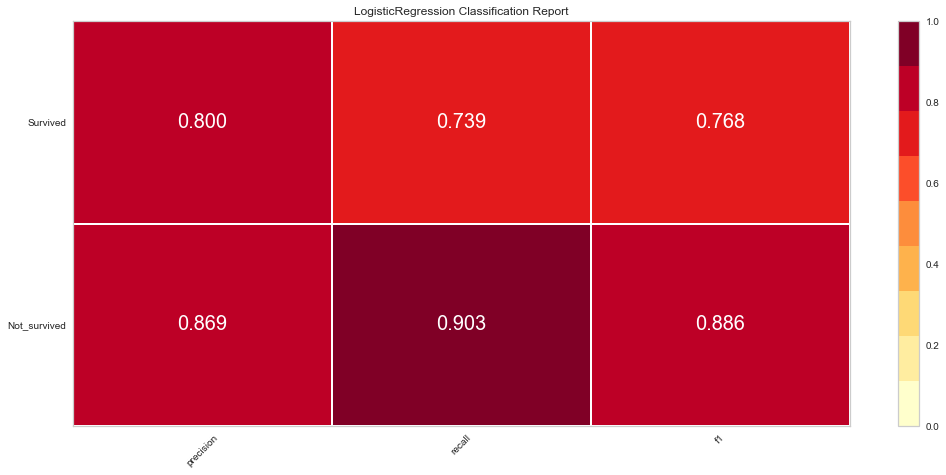

In [36]:
# Instantiate the visualizer

visualizer = ClassificationReport(model, classes=classes)

# Fit the training data to the visualizer

visualizer.fit(X_train, y_train)  

# Evaluate the model on the test data

visualizer.score(X_test, y_test)  
g = visualizer.poof();


/Users/ganeshkale/work/dsc550datamining/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


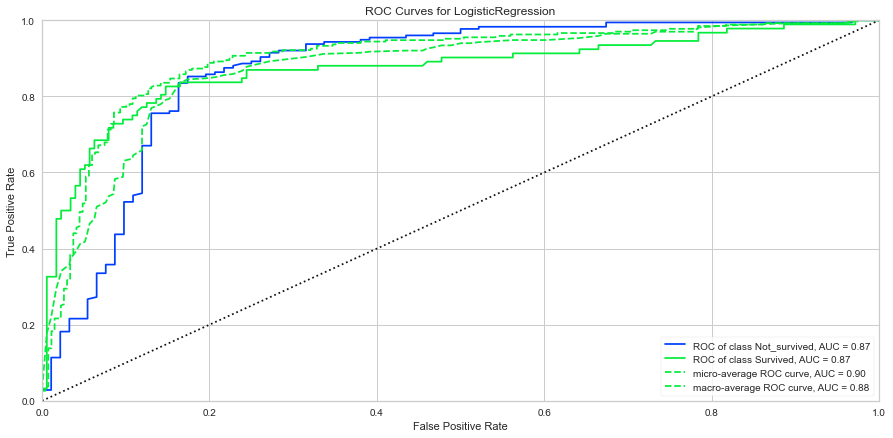

In [42]:
# ROC and AUC
#Instantiate the visualizer and logisticeregression

model = lm.LogisticRegression()
visualizer = ROCAUC(model, classes=classes)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer

#  # Evaluate the model on the test data
visualizer.score(X_test, y_test) 
g = visualizer.poof();

# END